In [68]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

from matplotlib import pyplot as plt
plt.style.use(['science','no-latex','grid','high-contrast','notebook']) # high-contrast指的是配色的选取
%pylab inline

# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=5  # 设置dataframe最多的显示行数
import os
from os import path as osp
import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


/home/hesy/.conda/envs/tf1.15/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


base_settings

# tmp

确认下drl-te训练得怎样了

Text(0, 0.5, 'util')

Text(0.5, 0, 'train step index')

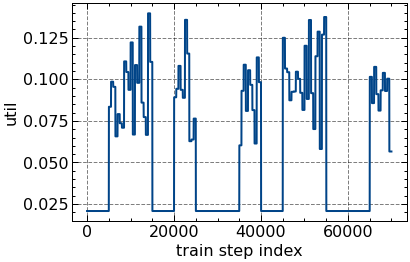

In [26]:
util = np.loadtxt('/home/hesy/projects/mars/baseline_DRL-TE/log/log/base0.1_burst20_epo500_epi1000/util.log')
plt.plot(range(len(util[:70000])),util[:70000])
plt.ylabel('util')
plt.xlabel('train step index')

Text(0, 0.5, 'rwd')

Text(0.5, 0, 'train step index')

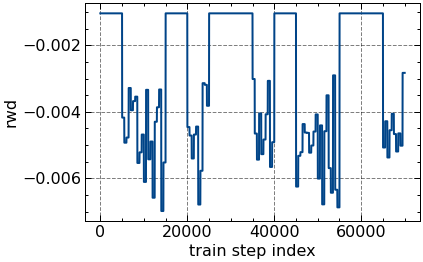

In [25]:
rwd = np.loadtxt('/home/hesy/projects/mars/baseline_DRL-TE/log/log/base0.1_burst20_epo500_epi1000/rwd.log')
plt.plot(range(len(rwd[:70000])),rwd[:70000])
plt.ylabel('rwd')
plt.xlabel('train step index')

# read in data

In [2]:
MORE_DETAIL = False
node = 23

lamTimes,cdflam=1,0
record_interval = "0.005000" #  "0.010000"      "0.100000"      "1.000000"

## ==== may need change ====
titles = ["util"]

CUT_OFF = 6000 # max timestep in pic
## ========================

## ospf

In [3]:
port_ospf = 77000
proName_ospf="ospf-subGEA" #"lp_73god_view" #"lp-trueTM"
parDir_ospf =f"ns3-test/data/{proName_ospf}/{record_interval}_lamTimes{lamTimes}_cdflam{cdflam}_port{port_ospf}/"
util_file_ospf =f"traces/util_{record_interval}.txt"
file_list_ospf = [util_file_ospf] 

"""
* each value for datas_ospf is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )
    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame
* each value for describes_ospf, 每一行是一个时间点 for each value
"""
datas_ospf,describes_ospf = defaultdict(),defaultdict() 
for (i,name) in enumerate(titles):
    file = file_list_ospf[i]
    datas_ospf[name] = pd.DataFrame(np.loadtxt(osp.join(parDir_ospf,file)))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_ospf:
        datas_ospf[name]*=100
    describes_ospf[name]=pd.DataFrame({\
                                      "0.5":datas_ospf[name].transpose().quantile(0.5),\
                                      "0.9":datas_ospf[name].transpose().quantile(0.9),\
                                      "max":datas_ospf[name].transpose().quantile(1)}\
                                    )

'\n* each value for datas_ospf is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )\n    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame\n* each value for describes_ospf, 每一行是一个时间点 for each value\n'

## rl

In [4]:
port_rl = 42500
proName_rl="rl-subGEA" #"lp_73god_view" #"lp-trueTM"
parDir_rl =f"mars_ns3/data/{proName_rl}/{record_interval}_lamTimes{lamTimes}_cdflam{cdflam}_port{port_rl}/"
util_file_rl =f"traces/util_{record_interval}.txt"
file_list_rl = [util_file_rl] 

"""
* each value for datas_rl is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )
    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame
* each value for describes_rl, 每一行是一个时间点 for each value
"""
datas_rl,describes_rl = defaultdict(),defaultdict() 
for (i,name) in enumerate(titles):
    file = file_list_rl[i]
    datas_rl[name] = pd.DataFrame(np.loadtxt(osp.join(parDir_rl,file)))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_rl:
        datas_rl[name]*=100
    describes_rl[name]=pd.DataFrame({\
                                      "0.5":datas_rl[name].transpose().quantile(0.5),\
                                      "0.9":datas_rl[name].transpose().quantile(0.9),\
                                      "max":datas_rl[name].transpose().quantile(1)}\
                                    )

'\n* each value for datas_rl is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )\n    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame\n* each value for describes_rl, 每一行是一个时间点 for each value\n'

## lp

In [72]:
port_lp = 77300
proName_lp="lp-subGEA" #"lp_73god_view" #"lp-trueTM"
parDir_lp =f"mars_ns3/data/{proName_lp}/{record_interval}_lamTimes{lamTimes}_cdflam{cdflam}_port{port_lp}/"
util_file_lp =f"traces/util_{record_interval}.txt"
file_list_lp = [util_file_lp] 

"""
* each value for datas_lp is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )
    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame
* each value for describes_lp, 每一行是一个时间点 for each value
"""
datas_lp,describes_lp = defaultdict(),defaultdict() 
for (i,name) in enumerate(titles):
    file = file_list_lp[i]
    datas_lp[name] = pd.DataFrame(np.loadtxt(osp.join(parDir_lp,file)))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_lp:
        datas_lp[name]*=100
    describes_lp[name]=pd.DataFrame({\
                                      "0.5":datas_lp[name].transpose().quantile(0.5),\
                                      "0.9":datas_lp[name].transpose().quantile(0.9),\
                                      "max":datas_lp[name].transpose().quantile(1)}\
                                    )

'\n* each value for datas_lp is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )\n    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame\n* each value for describes_lp, 每一行是一个时间点 for each value\n'

## drl-te

In [28]:
port_drl = 77900
proName_drl="drl-subGEA" 
parDir_drl =f"mars_ns3/data/{proName_drl}/{record_interval}_lamTimes{lamTimes}_cdflam{cdflam}_port{port_drl}/"
util_file_drl =f"traces/util_{record_interval}.txt"
file_list_drl = [util_file_drl] 

datas_drl,describes_drl = defaultdict(),defaultdict() 
for (i,name) in enumerate(titles):
    file = file_list_drl[i]
    datas_drl[name] = pd.DataFrame(np.loadtxt(osp.join(parDir_drl,file)))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_drl:
        datas_drl[name]*=100
    describes_drl[name]=pd.DataFrame({\
                                      "0.5":datas_drl[name].transpose().quantile(0.5),\
                                      "0.9":datas_drl[name].transpose().quantile(0.9),\
                                      "max":datas_drl[name].transpose().quantile(1)}\
                                    )

## 统计图汇总

In [ ]:
where(describes_ospf['util']['max']>2)
where(describes_ospf['util']['max']>20)

Text(0.5, 0, 'record steps( each 0.005000s)')

Text(0, 0.5, 'percentile(%)')

Text(0.5, 1.0, '23_recordInterval0.005000_lamTimes1_util')

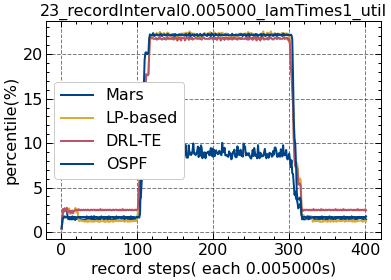

In [73]:
dim = 'max'
for metric in titles:
    rl_dim = describes_rl[metric][dim]
    lp_dim = describes_lp[metric][dim]
    drl_dim = describes_drl[metric][dim]
    ospf_dim = describes_ospf[metric][dim]

    for datas in [\
                  rl_dim,\
                  lp_dim,\
                  drl_dim,\
                  ospf_dim,\
                 ]:
        plt.plot(range(1,len(datas)+1),datas,'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('percentile(%)')
plt.legend([ 
            'Mars',\
            'LP-based',\
            'DRL-TE',\
            'OSPF'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)

把细节放大了看

🌟🌟 [legend位置微调](https://zhuanlan.zhihu.com/p/99531531)

Text(0.5, 0, 'record timesteps (each 5 ms)')

Text(0, 0.5, 'Utilization Ratio (%)')

"\n    plt.legend([ \n                'Mars',                'LP-based routing',                'DRL-TE',                'OSPF',               ])\n    "

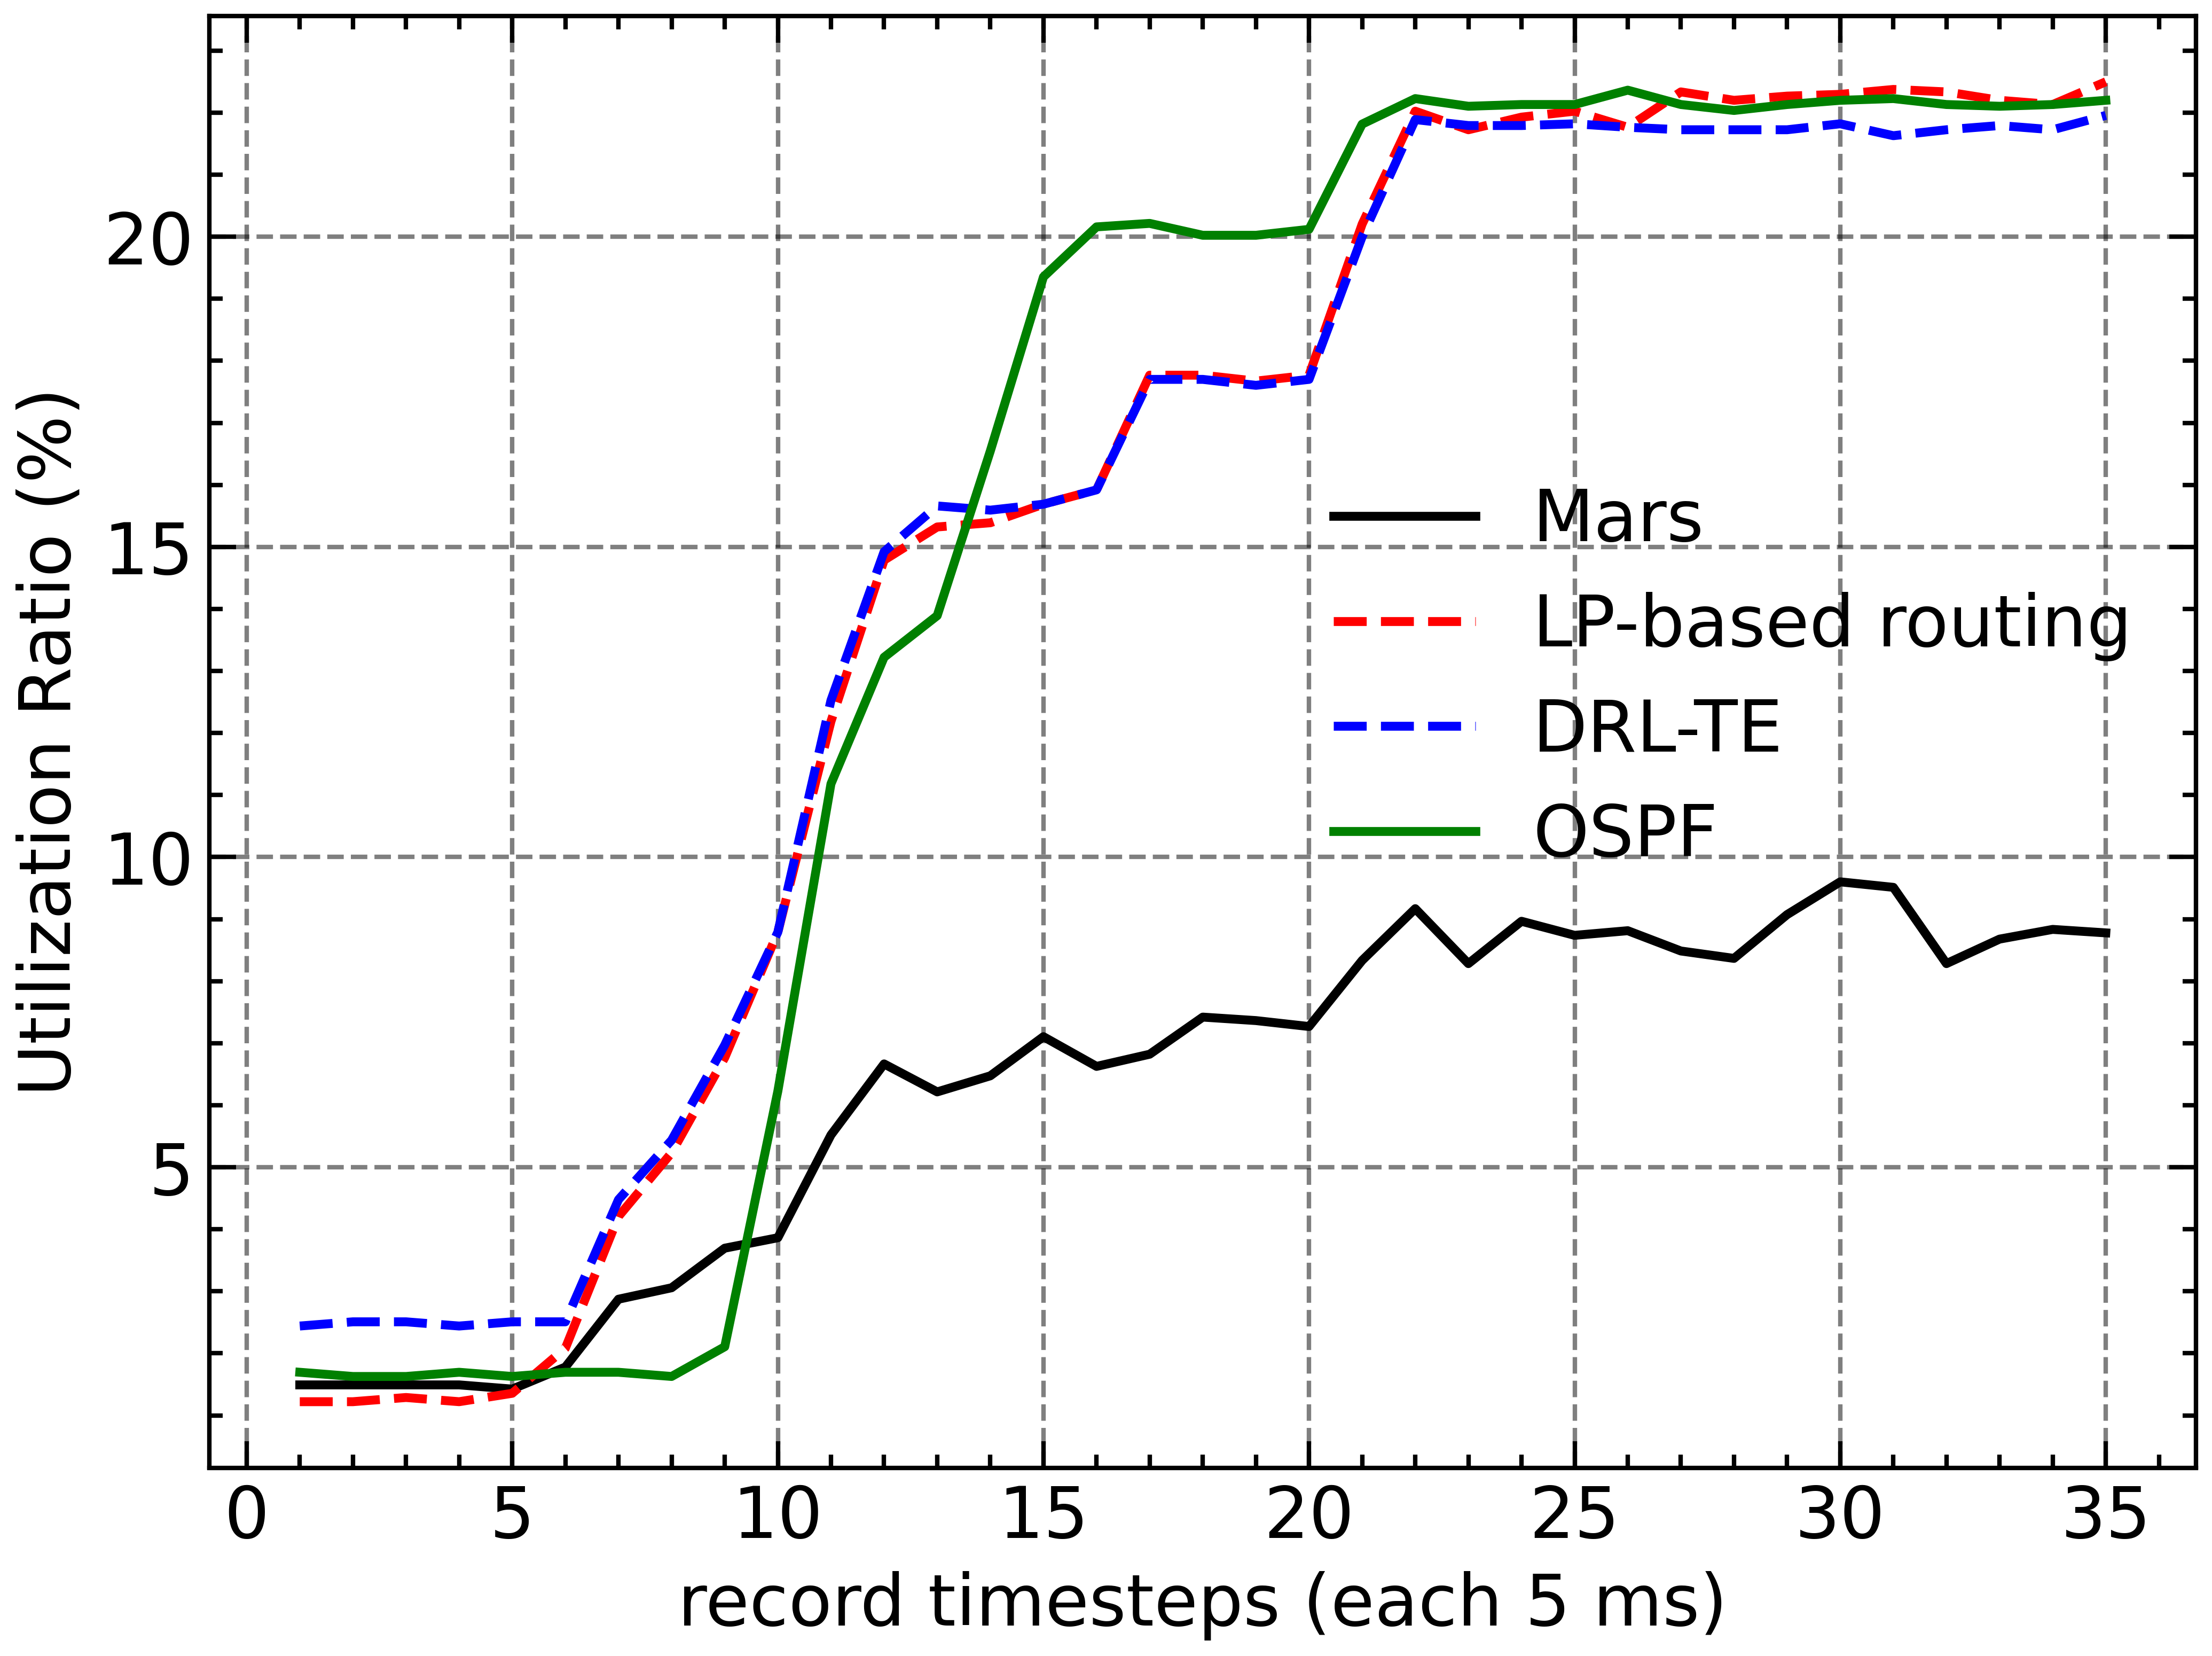

In [78]:
with plt.style.context(['science','ieee','no-latex','notebook']): #
    style=['-','--','--','-']
    dim = 'max'
    for metric in titles:
        rl_dim = describes_rl[metric][dim]
        lp_dim = describes_lp[metric][dim]
        drl_dim = describes_drl[metric][dim]
        ospf_dim = describes_ospf[metric][dim]

        for index,datas in enumerate([\
                      rl_dim,\
                      lp_dim,\
                      drl_dim,\
                      ospf_dim,\
                     ]):
#             plt.plot(range(1,len(datas[95:130])+1),datas[95:130],style[index])
            plt.plot(range(1,len(datas[95:130])+1),datas[95:130],style[index])

    plt.xlabel(f'record timesteps (each 5 ms)')
    plt.ylabel('Utilization Ratio (%)')
    """
    plt.legend([ 
                'Mars',\
                'LP-based routing',\
                'DRL-TE',\
                'OSPF',\
               ])
    """
    # tmp
    plt.legend([ 
            'Mars',\
            'LP-based routing',\
            'DRL-TE',\
            'OSPF',\
           ],loc='upper right',bbox_to_anchor=(1,18/25))
#     fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
#     plt.title(fileName)
    plt.savefig(f"insight-busrst.pdf")

In [76]:
rl_mean=mean(describes_rl['util']['max'])
ospf_mean=mean(describes_ospf['util']['max'])
lp_mean=mean(describes_lp['util']['max'])
drl_mean=mean(describes_drl['util']['max'])
(ospf_mean-rl_mean)/rl_mean

1.3007836040574838

In [77]:
rl_mean
lp_mean
drl_mean
ospf_mean

5.1676309226932675

11.755229925187033

12.0363608478803

11.889600498753117

## 在多条备选路径上的情况对比

In [160]:
# parDir =  # TODO
def getRatios(parDir):
    count = 0
    for file in os.listdir(parDir):
        if file.find('Table1-CoarseRoute.')!=-1:
            count+=1

    hop1,hop2,hop3 = [],[],[]
    for index in range(2,count+1):
        coarse_file = osp.join(parDir,f'Table1-CoarseRoute.{index}')
        with open(coarse_file) as cf:
            lines=cf.readlines()
            for line in lines:
                find_res = match_pat.findall(line)
                if find_res and len(find_res[0])==3 :
                    hop1.append(float(find_res[0][0]))
                    hop2.append(float(find_res[0][1]))
                    hop3.append(float(find_res[0][2]))
                    break

            if line == lines[-1]:
                raise ValueError('do not find traget candidate paths 4-6')
    
    return hop1,hop2,hop3

In [163]:
# to update for generalization
parDir_rl='/home/hesy/projects/g1/pro/mars_ns3/data/rl-subGEA/0.005000_lamTimes1_cdflam0_port42500'
parDir_lp='/home/hesy/projects/g1/pro/mars_ns3/data/lp-subGEA/0.005000_lamTimes1_cdflam0_port77300'
parDir_drl='/home/hesy/projects/g1/pro/mars_ns3/data/drl-subGEA/0.005000_lamTimes1_cdflam0_port77900'
match_pat = re.compile('value\s+?:\s+?4\s+?:\s+?([0,1].\d+?)\s+?5\s+?:\s+?([0,1].\d+?)\s+?6\s+?:\s+?([0,1].\d+)\s*?')#(0.\d+?)

In [164]:
hop1_rl,hop2_rl,hop3_rl=getRatios(parDir_rl)
hop1_drl,hop2_drl,hop3_drl=getRatios(parDir_drl)
hop1_lp,hop2_lp,hop3_lp=getRatios(parDir_lp)

In [169]:
x_rl = np.array(range(len(hop1_rl)))*10
x_drl = np.array(range(len(hop1_drl)))*41
x_lp = np.array(range(len(hop1_lp)))*55

考虑用曲线堆积图来做

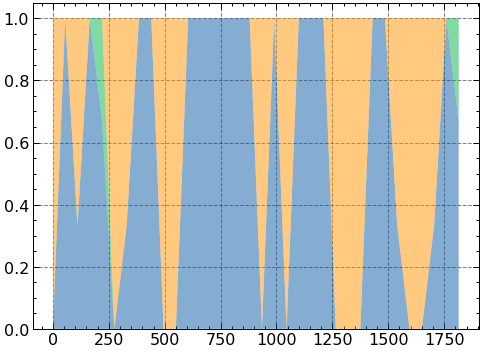

In [174]:
with plt.style.context(['science','no-latex','notebook']): #
    plt.stackplot(x_lp, hop1_lp, hop2_lp, hop3_lp, alpha=0.5)
#     plt.legend()

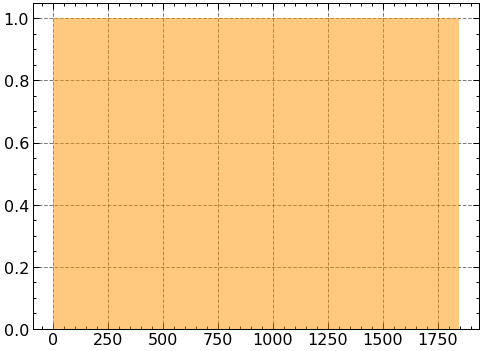

In [175]:
with plt.style.context(['science','no-latex','notebook']): #
    plt.stackplot(x_drl, hop1_drl, hop2_drl, hop3_drl, alpha=0.5)
#     plt.legend()

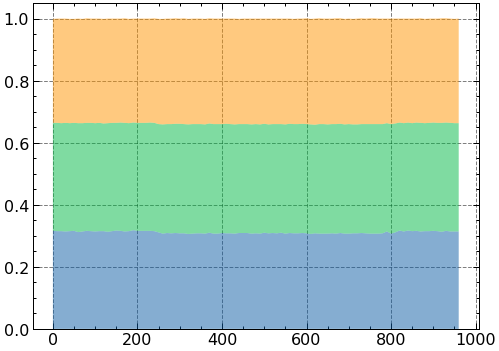

In [176]:
with plt.style.context(['science','no-latex','notebook']): #
    plt.stackplot(x_rl, hop1_rl, hop2_rl, hop3_rl, alpha=0.5)
#     plt.legend()

demo

([<matplotlib.axis.XTick at 0x7f6c84018210>,
 [Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09')])

(0.0, 12500.0)

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number')

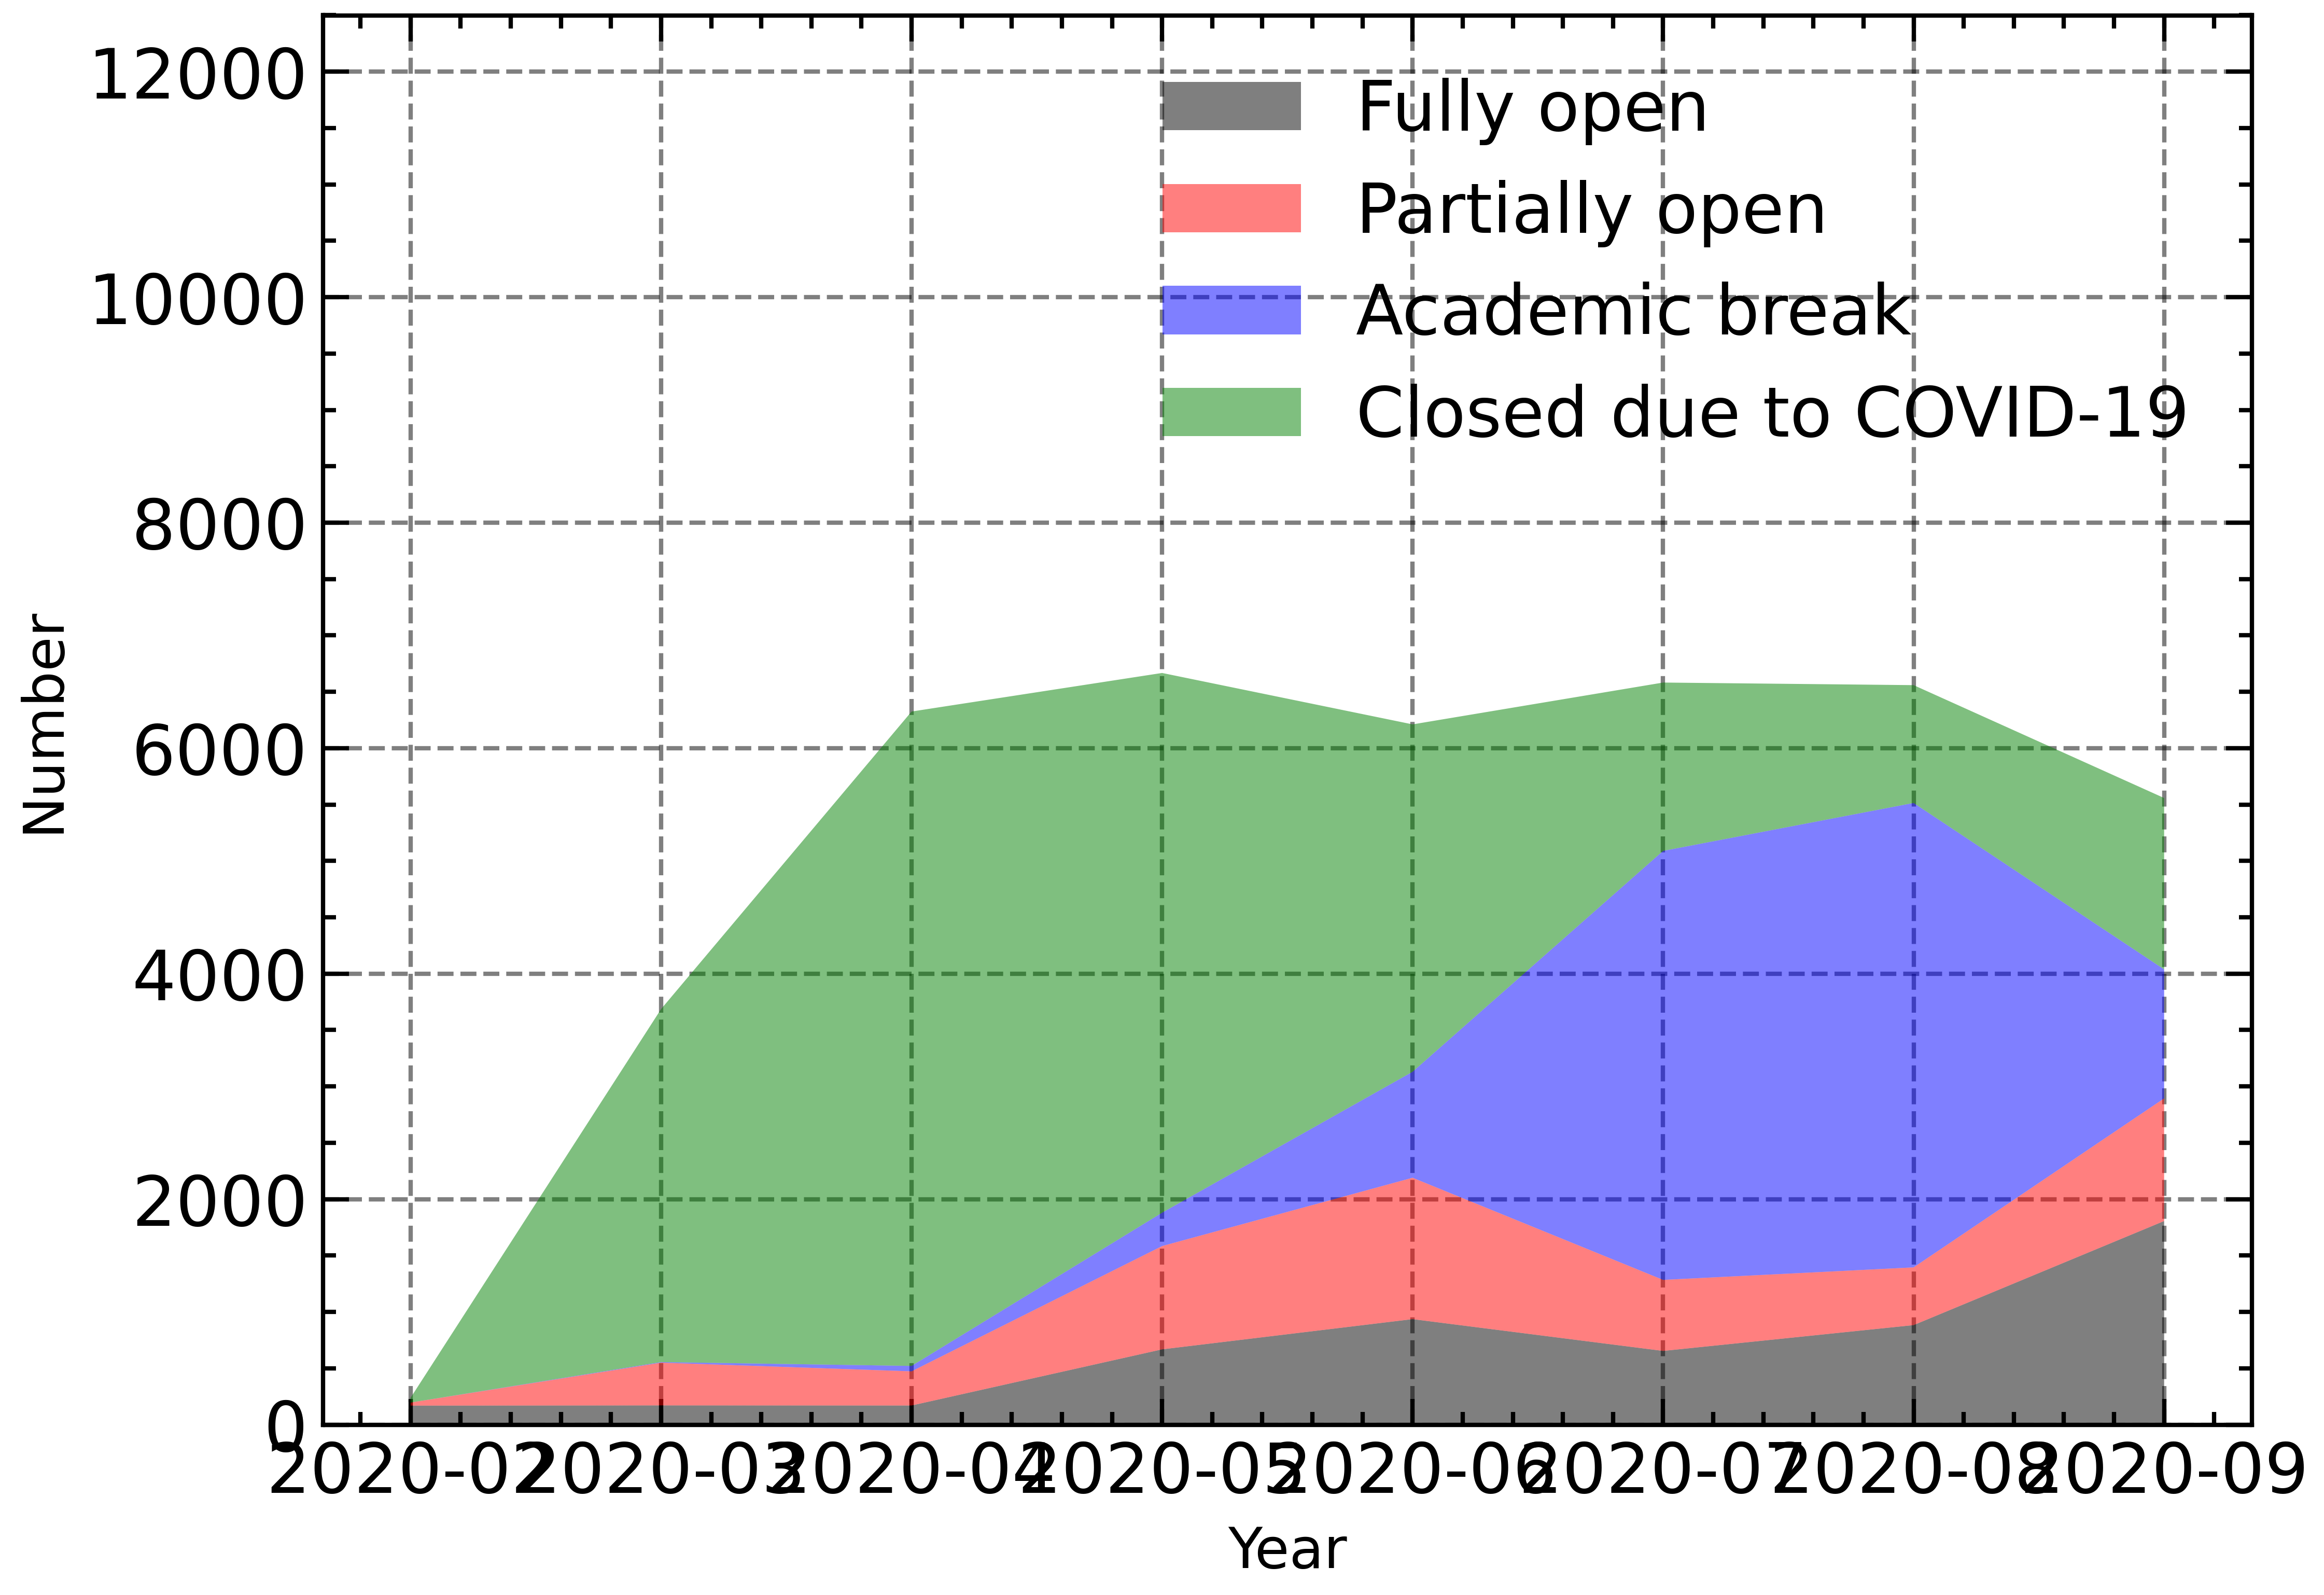

In [71]:
import matplotlib.pyplot as plt
with plt.style.context(['science','ieee','no-latex','notebook']): #
    x = [1,2,3,4,5,6,7,8]
    y = [169, 171, 170, 668, 936, 654, 883, 1806]
    y1 = [27, 379, 303, 916, 1254, 630, 512, 1088]
    y2 = [0, 5, 48, 296, 940, 3805, 4119, 1144]
    y3 = [42, 3131, 5804, 4787, 3081, 1493, 1045, 1520]
    # fig, ax = plt.subplots(facecolor='white',figsize=(16,9))
    fig, ax = plt.subplots()
    labels = ["Fully open", "Partially open", "Academic break", "Closed due to COVID-19"]
    # colors = ["#8da0cb", "#fc8d62", "#66c2a5", "red"]
    plt.xticks((1,2,3,4,5,6,7,8),
               ('2020-02','2020-03','2020-04','2020-05',
                '2020-06','2020-07','2020-08','2020-09'),)#, rotation=90
    #             '2020-06','2020-07','2020-08','2020-09'), fontsize=10)#, rotation=90
    # plt.stackplot(x, y, y1, y2, y3, labels=labels, colors=colors, alpha=0.5)
    plt.stackplot(x, y, y1, y2, y3, labels=labels, alpha=0.5)
    plt.ylim((0, 12500))
    # plt.legend(loc="upper left")
    plt.legend()
#     plt.xlabel("Year")
#     plt.ylabel("Number")    
    plt.xlabel("Year", fontsize=13)
    plt.ylabel("Number", fontsize=13)

## 0.1s record 

In [47]:
port_ospf = 77000
record_interval='0.100000'
proName_ospf="ospf-subGEA" #"lp_73god_view" #"lp-trueTM"
parDir_ospf =f"ns3-test/data/{pro}/{record_interval}_lamTimes{lamTimes}_cdflam{cdflam}_port{port}/"
util_file_ospf =f"traces/util_{record_interval}.txt"
file_list_ospf = [util_file_ospf] 

"""
* each value for datas_ospf is data of ( node*(node-1) , timestep ) dimensions ( each key是观测属性index，比如util,queue )
    从每个观测属性中提取的统计数据 -- 现在只需要50%分位 以及 90%分位 ; describes[key] 包含["0.5": ... ; "0.9": ...] 的DataFrame
* each value for describes_ospf, 每一行是一个时间点 for each value
"""
datas_ospf,describes_ospf = defaultdict(),defaultdict() 
for (i,name) in enumerate(titles):
    file = file_list_ospf[i]
    datas_ospf[name] = pd.DataFrame(np.loadtxt(osp.join(parDir_ospf,file)))  # 行是node*(node-1)那么多的数据，列是时间轴
    if file == util_file_ospf:
        datas_ospf[name]*=100
    describes_ospf[name]=pd.DataFrame({\
                                      "0.5":datas_ospf[name].transpose().quantile(0.5),\
                                      "0.9":datas_ospf[name].transpose().quantile(0.9),\
                                      "max":datas_ospf[name].transpose().quantile(1)}\
                                    )

Text(0.5, 1.0, '23_recordInterval0.100000_lamTimes1_util')

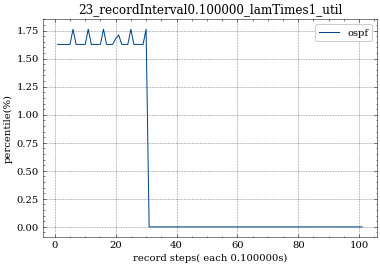

In [48]:
dim = 'max'
for metric in titles:
#     rl_dim = describes_rl[metric][dim]
#     lp_dim = describes_lp[metric][dim]
    ospf_dim = describes_ospf[metric][dim]

    for datas in [\
#                   rl_dim,\
#                   lp_dim,\
                  ospf_dim\
                 ]:
        plt.plot(range(1,len(datas)+1),datas,'-')

plt.xlabel(f'record steps( each {record_interval}s)')
plt.ylabel('percentile(%)')
plt.legend([ 
#             'rl',\
#             'lp',\
            'ospf'\
           ])
fileName= f"{node}_recordInterval{record_interval}_lamTimes{lamTimes}_{titles[i]}"
plt.title(fileName)